In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt

# Load the CSV file into a DataFrame
df = pd.read_csv('final_data.csv')
df.columns

Index(['CITY', 'DISTRICT', 'ADDRESS', 'TALUK', 'PINCODE', 'GENDER',
       'FAMILY_INCOME', 'CET_RANK', 'KEA_CLAIM_CAT', 'ADMIN MODE', 'AdminYear',
       'SSLCTOTMARKS', 'PUCTOTMARKS', 'PUC_INSTITUTE', 'puc_yr_pass',
       'sslc_yr_pass', 'PCM_total', 'PCM %', 'STATE', 'Religion/ Caste'],
      dtype='object')

In [2]:
data = df.groupby(['AdminYear', 'DISTRICT']).size().reset_index(name='students_count')
data.head(15)

,AdminYear,DISTRICT,students_count
0,2019,BANGALORE,1
1,2019,HASSAN,1
2,2019,UDUPI,83
3,2020,RAICHUR,1
4,2020,SHIVAMOGGA,1
5,2020,UDUPI,59
6,2020,UTTARA KANNADA,3
7,2021,BELGAUM,1
8,2021,DAKSHINA KANNADA,1
9,2021,DHARWAD,1


In [3]:
pivot_data = data.pivot_table(index='AdminYear', columns=['DISTRICT'], values='students_count', fill_value=0)

In [4]:
pivot_data.head(7)

DISTRICT,BAGALKOT,BANGALORE,BELGAUM,BELLARY,BIDAR,BIJAPURA,CHIKKAMANGALURU,DAKSHINA KANNADA,DAVANAGERE,DHARWAD,...,HAVERI,MADHEPURA,RAICHUR,SHIVAMOGGA,THANE,TUMKUR,UDUPI,UTTARA KANNADA,VIJAYANAGARA,YADGIR
AdminYear,,,,,,,,,,,,,,,,,,,,,
2019,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,83.0,0.0,0.0,0.0
2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,59.0,3.0,0.0,0.0
2021,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,1.0,1.0,0.0,4.0,1.0,0.0,52.0,3.0,0.0,0.0
2022,1.0,0.0,0.0,3.0,1.0,0.0,3.0,1.0,1.0,0.0,...,1.0,0.0,0.0,4.0,0.0,0.0,103.0,4.0,0.0,2.0
2023,1.0,2.0,0.0,0.0,0.0,1.0,1.0,3.0,0.0,0.0,...,1.0,0.0,2.0,5.0,0.0,2.0,85.0,4.0,1.0,1.0


In [5]:
# Dictionary to store predictions
predictions = {}

# Iterate over each district
for district in pivot_data.columns:
    try:
        # Extract the time series data for the district
        ts = pivot_data[district]

        # Ensure there are enough data points to train the model
        if len(ts.dropna()) >= 2:
            print(f"Modeling {district} with {len(ts.dropna())} data points")

            # SARIMA model with seasonal_order=(1, 1, 1, 1) for yearly data
            model = SARIMAX(ts, order=(1, 1, 1), seasonal_order=(1, 1, 1, 5))
            model_fit = model.fit(disp=False)  # disp=False to avoid warning about convergence

            # Forecasting one step ahead
            forecast = model_fit.get_forecast(steps=1)
            predictions[district] = forecast.predicted_mean.iloc[0]

        else:
            print(f"Not enough data points for {district}. Skipping modeling.")

    except Exception as e:
        print(f"Error in modeling {district}: {str(e)}")

Modeling BAGALKOT with 5 data points
Modeling BANGALORE with 5 data points
Modeling BELGAUM with 5 data points
Modeling BELLARY with 5 data points
Modeling BIDAR with 5 data points
Modeling BIJAPURA with 5 data points
Modeling CHIKKAMANGALURU with 5 data points
Modeling DAKSHINA KANNADA with 5 data points
Modeling DAVANAGERE with 5 data points
Modeling DHARWAD with 5 data points
Modeling GADAG with 5 data points
Modeling HASSAN with 5 data points
Modeling HAVERI with 5 data points
Modeling MADHEPURA with 5 data points
Modeling RAICHUR with 5 data points
Modeling SHIVAMOGGA with 5 data points
Modeling THANE with 5 data points
Modeling TUMKUR with 5 data points
Modeling UDUPI with 5 data points
Modeling UTTARA KANNADA with 5 data points


/home/ramachandra/.local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ramachandra/.local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ramachandra/.local/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/home/ramachandra/.local/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observ

Modeling VIJAYANAGARA with 5 data points
Modeling YADGIR with 5 data points


/home/ramachandra/.local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/ramachandra/.local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/home/ramachandra/.local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ramachandra/.local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ramachandra/.local/lib/python3.11/s

In [6]:
# Convert predictions to a DataFrame
predictions_df = pd.DataFrame.from_dict(predictions, orient='index', columns=['predicted_students_enrolled'])
predictions_df.index.name = 'DISTRICT'
predictions_df.head()

,predicted_students_enrolled
DISTRICT,
BAGALKOT,1.000000e+00
BANGALORE,2.500000e+00
BELGAUM,7.164701e-33
BELLARY,-2.944579e-16
BIDAR,-6.114498e-17


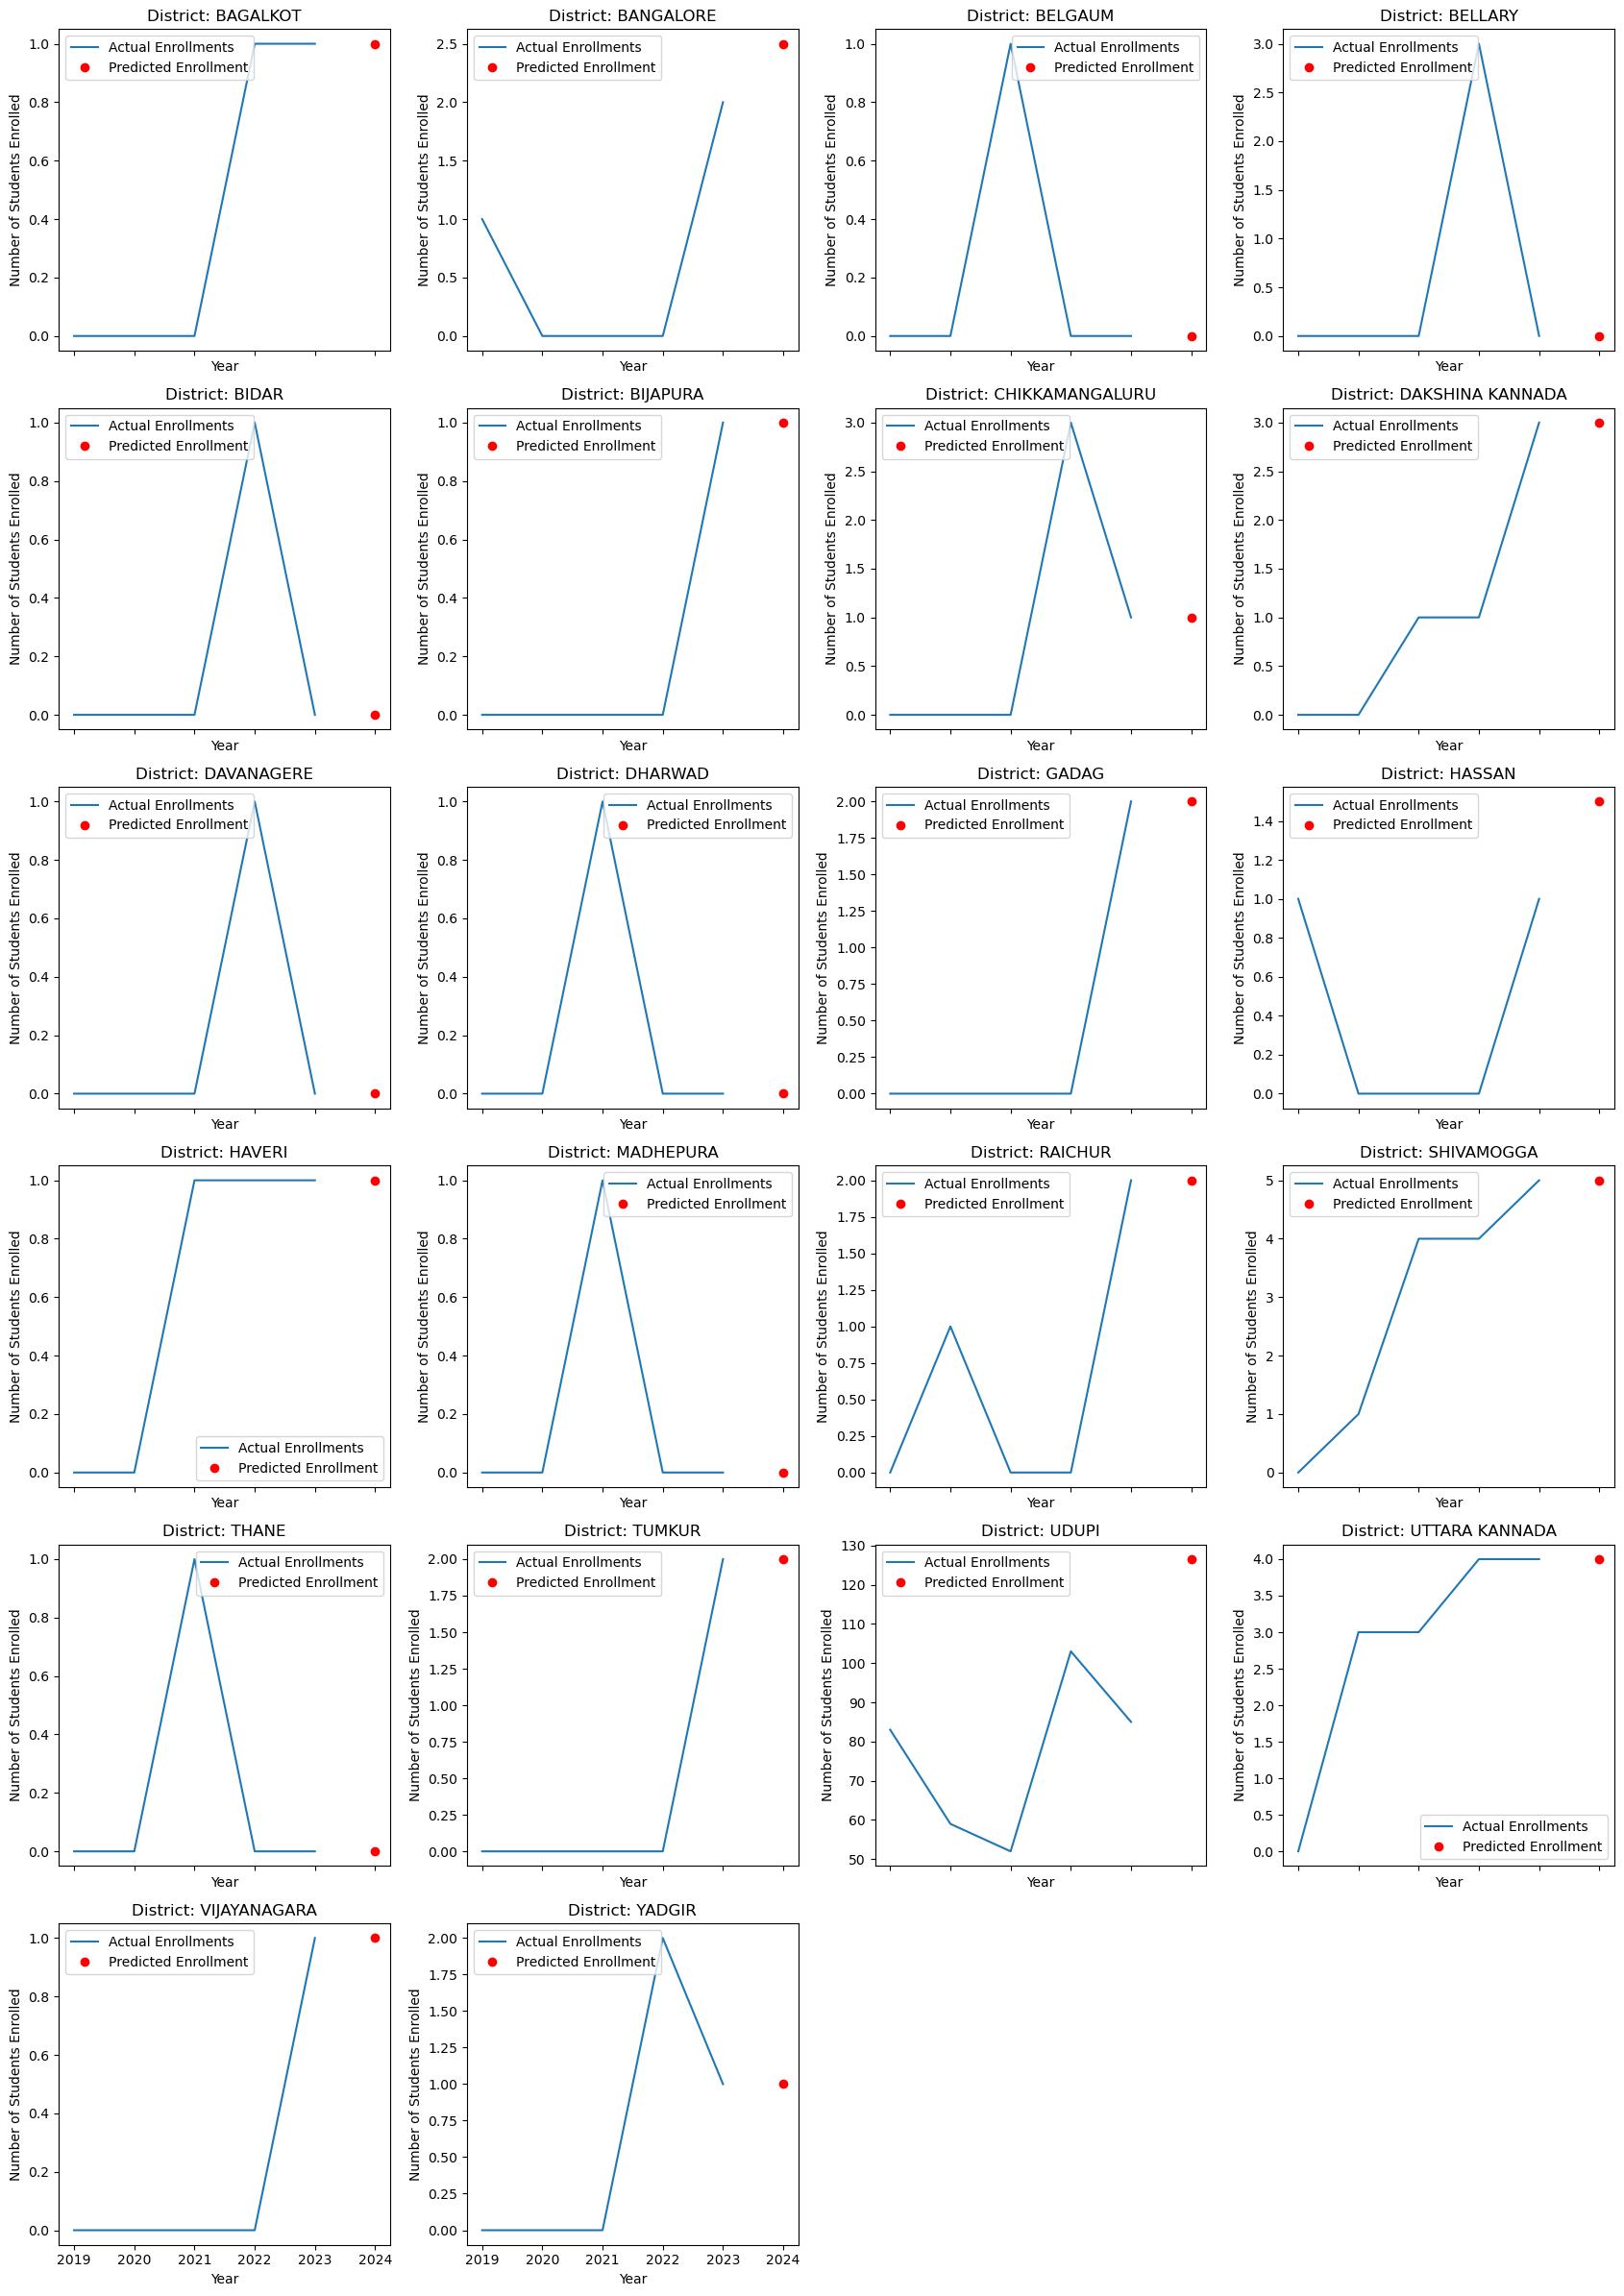

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Number of districts to plot
num_districts = len(predictions_df.index)

# Determine the number of rows and columns
n_cols = 4
n_rows = int(np.ceil(num_districts / n_cols))

# Create a figure and a grid of subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(17, 4 * n_rows), sharex=True)

# Flatten axes array for easier indexing
axes = axes.flatten()

# Loop through each district and plot the data
for i, district in enumerate(predictions_df.index):
    ts = pivot_data[district].dropna()
    ax = axes[i]
    ax.plot(ts.index, ts, label='Actual Enrollments')
    if district in predictions:
        ax.plot(ts.index[-1] + 1, predictions[district], 'ro', label='Predicted Enrollment')
    ax.set_title(f'District: {district}')
    ax.set_xlabel('Year')
    ax.set_ylabel('Number of Students Enrolled')
    ax.legend()

# Hide any unused subplots
for j in range(num_districts, len(axes)):
    axes[j].axis('off')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()
